In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run37-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20200218_MSrun037_pt-table-new.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=";")
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample name"] + "_" + df_pt["Samples order"]
df_pt.head()

,Samples order,Sample_ID,Sample name,MID,Project,Species,Chain,Patient,SampleInfo,UMI (yes or no),Sample
0,S1,N701_S502,IgSub-UMI1,NaN,IgSub,human,IgG,ID596,IgG UMI,yes,IgSub-UMI1_S1
1,S2,N702_S502,IgSub-UMI2,NaN,IgSub,human,IgG,ID629,IgG UMI,yes,IgSub-UMI2_S2
2,S3,N703_S502,IgSub-UMI3,NaN,IgSub,human,IgG,ID657,IgG UMI,yes,IgSub-UMI3_S3
3,S4,N704_S502,IgSub-UMI4,NaN,IgSub,human,IgG,ID638,IgG UMI,yes,IgSub-UMI4_S4
4,S5,N705_S502,IgSub-UMI5,NaN,IgSub,human,IgG,ID598,IgG UMI,yes,IgSub-UMI5_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles

['cdr3-clones-IgSub-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-Vasculitis-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,ID386t1-B_S31,CAKDLGPYNWNYQWGQGTLVT,484
1,ID386t1-B_S31,CAREKDYGDSSFDYWGQGTLVT,305
2,ID386t1-B_S31,CAHRLPPADYDFWSGYFDYWGQGTLVT,301
3,ID386t1-B_S31,CAHCDYTKWENYFDYWGQGTLVT,292
4,ID386t1-B_S31,CALLAPDVGVWGNGTTVT,261


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
63,VC018V2-IgG-LIN_S22,CASGGEFGEFFSYWGQGTLVT,1
64,VC018V2-IgG-LIN_S22,CGRIHMGRSKIDWFFDLWGHGTLVT,1
65,VC018V2-IgG-LIN_S22,CSRYCSGGSCYPDHYTYYGMDVWGQGTTVT,1
66,VC018V2-IgG-LIN_S22,CVGLGNYIYWGQGTLVT,1
67,VC018V2-IgG-LIN_S22,CVRDDEGDYPPDLDYWGQGTLVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Samples order,Sample_ID,Sample name,MID,Project,Species,Chain,Patient,SampleInfo,UMI (yes or no)
0,ID386t1-B_S31,CAKDLGPYNWNYQWGQGTLVT,484,S31,N710_S506,ID386t1-B,NaN,IgSub,human,BCRh,ID386,UMI-BCRh,yes
1,ID386t1-B_S31,CAREKDYGDSSFDYWGQGTLVT,305,S31,N710_S506,ID386t1-B,NaN,IgSub,human,BCRh,ID386,UMI-BCRh,yes
2,ID386t1-B_S31,CAHRLPPADYDFWSGYFDYWGQGTLVT,301,S31,N710_S506,ID386t1-B,NaN,IgSub,human,BCRh,ID386,UMI-BCRh,yes
3,ID386t1-B_S31,CAHCDYTKWENYFDYWGQGTLVT,292,S31,N710_S506,ID386t1-B,NaN,IgSub,human,BCRh,ID386,UMI-BCRh,yes
4,ID386t1-B_S31,CALLAPDVGVWGNGTTVT,261,S31,N710_S506,ID386t1-B,NaN,IgSub,human,BCRh,ID386,UMI-BCRh,yes


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,ID386,ID386t1-B_S31,CAAALGGSYNYWGQGTLVT,1
1,ID386,ID386t1-B_S31,CAAALTGTRGRLDYWGQGTLVT,10
2,ID386,ID386t1-B_S31,CAAARALSEAFDIWGQGTMVT,1
3,ID386,ID386t1-B_S31,CAAASSGYYPFDYWGQGTLVT,4
4,ID386,ID386t1-B_S31,CAAATFVRGWFDPWGQGTLVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,ID386t1-B_S31,89796
1,ID596t0-B_S25,125318
2,ID598t0-B_S26,261578
3,ID629t0-B_S27,126862
4,ID638t0-B_S28,172484


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,ID386,ID386t1-B_S31,CAAALGGSYNYWGQGTLVT,1,89796
1,ID386,ID386t1-B_S31,CAAALTGTRGRLDYWGQGTLVT,10,89796
2,ID386,ID386t1-B_S31,CAAARALSEAFDIWGQGTMVT,1,89796
3,ID386,ID386t1-B_S31,CAAASSGYYPFDYWGQGTLVT,4,89796
4,ID386,ID386t1-B_S31,CAAATFVRGWFDPWGQGTLVT,1,89796


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
355790,VC018V2,VC018V2-IgG-LIN_S22,CGRIHMGRSKIDWFFDLWGHGTLVT,1,36
355791,VC018V2,VC018V2-IgG-LIN_S22,CSRYCSGGSCYPDHYTYYGMDVWGQGTTVT,1,36
355792,VC018V2,VC018V2-IgG-LIN_S22,CVGLGNYIYWGQGTLVT,1,36
355793,VC018V2,VC018V2-IgG-LIN_S22,CVRDDEGDYPPDLDYWGQGTLVT,1,36
355794,VC018V2,VC018V2-IgG-LIN_S22,CVRDTYLNYGMDVWGQGTTVT,3,36


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,ID386,ID386t1-B_S31,CAAALGGSYNYWGQGTLVT,1,89796,0.001114
1,ID386,ID386t1-B_S31,CAAALTGTRGRLDYWGQGTLVT,10,89796,0.011136
2,ID386,ID386t1-B_S31,CAAARALSEAFDIWGQGTMVT,1,89796,0.001114
3,ID386,ID386t1-B_S31,CAAASSGYYPFDYWGQGTLVT,4,89796,0.004455
4,ID386,ID386t1-B_S31,CAAATFVRGWFDPWGQGTLVT,1,89796,0.001114


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['ID386t1-B_S31',
 'IgSub-LIn6_S20',
 'IgSub-UMI6_S6',
 'ID596t0-B_S25',
 'IgSub-LIN1_S15',
 'IgSub-UMI1_S1',
 'ID598t0-B_S26',
 'IgSub-LIN5_S19',
 'IgSub-UMI5_S5',
 'ID629t0-B_S27']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,IgSub-LIn6_S20,ID386t1-B_S31,61.755647,7.569379
1,IgSub-UMI6_S6,ID386t1-B_S31,45.185252,5.302018
2,ID596t0-B_S25,ID386t1-B_S31,0.071019,0.032295
3,IgSub-LIN1_S15,ID386t1-B_S31,0.069551,0.008909
4,ID386t1-B_S31,IgSub-UMI1_S1,0.000000,0.000000


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,IgSub-LIn6_S20,ID386t1-B_S31,61.755647,7.569379,ID386,ID386
1,IgSub-UMI6_S6,ID386t1-B_S31,45.185252,5.302018,ID386,ID386
2,ID596t0-B_S25,ID386t1-B_S31,0.071019,0.032295,ID596,ID386
3,IgSub-LIN1_S15,ID386t1-B_S31,0.069551,0.008909,ID596,ID386
4,IgSub-LIN5_S19,ID386t1-B_S31,0.002403,0.002227,ID598,ID386


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,256,IgSub-UMI10_S10,IgSub-UMI8_S8,88.132789,83.819251,PRIK004,PRIK004
1,421,IgSub-UMI9_S9,IgSub-UMI10_S10,84.555814,81.956657,PRIK004,PRIK004
2,257,IgSub-UMI9_S9,IgSub-UMI8_S8,86.058101,79.686237,PRIK004,PRIK004
3,423,IgSub-UMI11_S11,IgSub-UMI10_S10,81.798871,78.585882,PRIK004,PRIK004
4,424,IgSub-UMI12_S12,IgSub-UMI10_S10,84.608395,78.347611,PRIK004,PRIK004


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,256,IgSub-UMI10_S10,IgSub-UMI8_S8,88.132789,83.819251,PRIK004,PRIK004,same
1,421,IgSub-UMI9_S9,IgSub-UMI10_S10,84.555814,81.956657,PRIK004,PRIK004,same
2,257,IgSub-UMI9_S9,IgSub-UMI8_S8,86.058101,79.686237,PRIK004,PRIK004,same
3,423,IgSub-UMI11_S11,IgSub-UMI10_S10,81.798871,78.585882,PRIK004,PRIK004,same
4,424,IgSub-UMI12_S12,IgSub-UMI10_S10,84.608395,78.347611,PRIK004,PRIK004,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run37-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,256,IgSub-UMI10_S10,IgSub-UMI8_S8,88.132789,83.819251,PRIK004,PRIK004,same
1,1,421,IgSub-UMI9_S9,IgSub-UMI10_S10,84.555814,81.956657,PRIK004,PRIK004,same
2,2,257,IgSub-UMI9_S9,IgSub-UMI8_S8,86.058101,79.686237,PRIK004,PRIK004,same
3,3,423,IgSub-UMI11_S11,IgSub-UMI10_S10,81.798871,78.585882,PRIK004,PRIK004,same
4,4,424,IgSub-UMI12_S12,IgSub-UMI10_S10,84.608395,78.347611,PRIK004,PRIK004,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,256,IgSub-UMI10_S10,IgSub-UMI8_S8,88.132789,83.819251,PRIK004,PRIK004,same,IgSub-UMI10_S10->IgSub-UMI8_S8,purple
1,1,421,IgSub-UMI9_S9,IgSub-UMI10_S10,84.555814,81.956657,PRIK004,PRIK004,same,IgSub-UMI9_S9->IgSub-UMI10_S10,purple
2,2,257,IgSub-UMI9_S9,IgSub-UMI8_S8,86.058101,79.686237,PRIK004,PRIK004,same,IgSub-UMI9_S9->IgSub-UMI8_S8,purple
3,3,423,IgSub-UMI11_S11,IgSub-UMI10_S10,81.798871,78.585882,PRIK004,PRIK004,same,IgSub-UMI11_S11->IgSub-UMI10_S10,purple
4,4,424,IgSub-UMI12_S12,IgSub-UMI10_S10,84.608395,78.347611,PRIK004,PRIK004,same,IgSub-UMI12_S12->IgSub-UMI10_S10,purple


Wrote run37-IGH-HUMAN-shared-clones-all.pdf to disk


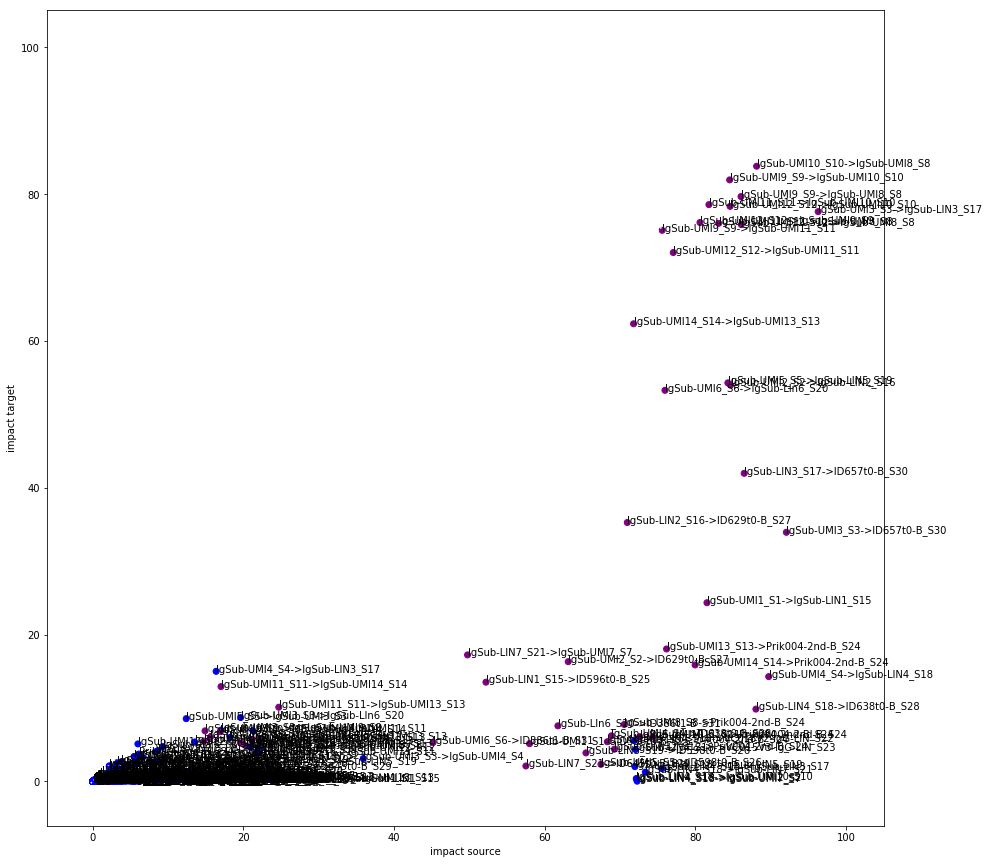

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,23,IgSub-UMI4_S4,IgSub-LIN3_S17,16.388984,14.994962,different,IgSub-UMI4_S4->IgSub-LIN3_S17,blue
1,29,IgSub-UMI3_S3,IgSub-LIn6_S20,19.642926,8.701232,different,IgSub-UMI3_S3->IgSub-LIn6_S20,blue
2,30,IgSub-UMI5_S5,IgSub-UMI3_S3,12.419265,8.548447,different,IgSub-UMI5_S5->IgSub-UMI3_S3,blue
3,33,IgSub-UMI3_S3,IgSub-UMI9_S9,17.024940,6.992216,different,IgSub-UMI3_S3->IgSub-UMI9_S9,blue
4,34,IgSub-UMI3_S3,IgSub-UMI11_S11,21.263829,6.912666,different,IgSub-UMI3_S3->IgSub-UMI11_S11,blue


Wrote run37-IGH-HUMAN-shared-clones-different-ids.pdf to disk


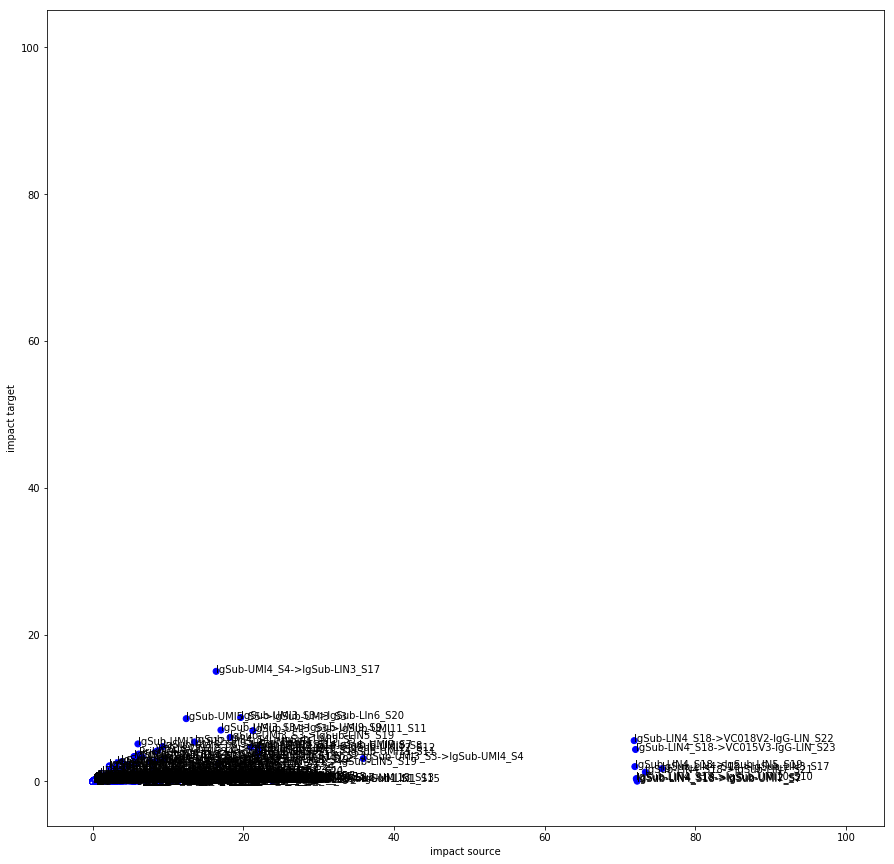

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)